<a href="https://colab.research.google.com/github/aly202012/EnlighterJS/blob/master/The_latest_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calling some important libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,5)

# reading data

In [2]:
data=pd.read_csv('/content/marwa.csv')

In [3]:
data.shape

(1120, 18)

In [4]:
data.head()

,YEAR,Y,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16
0,2018,1,4.676,6.034,3.317,0.628,0.602,0.959,1.150,1.745,1.000,0.357,0.357,3.433,0.114,0.068,0.192,0.068
1,2017,1,4.849,5.824,3.862,0.667,0.571,0.856,1.033,1.291,1.000,0.383,0.383,3.343,0.152,0.087,0.226,0.087
2,2016,1,4.450,5.388,3.649,0.651,0.701,1.078,1.324,1.592,1.054,0.383,0.404,3.343,0.099,0.070,0.172,0.066
3,2015,1,8.124,9.276,6.541,0.816,0.750,0.919,1.030,1.303,1.000,0.687,0.687,7.807,0.105,0.079,0.115,0.079
4,2014,1,5.301,6.719,3.905,0.798,0.526,0.659,0.774,1.133,1.000,0.747,0.747,6.289,0.083,0.044,0.059,0.044


In [5]:
data.tail()

,YEAR,Y,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16
1115,2015,0,1.550,2.424,0.375,0.331,0.129,0.389,0.663,2.518,1.0,0.343,0.343,2.514,-0.451,-0.058,-0.169,-0.058
1116,2014,0,0.926,1.854,0.066,0.258,0.114,0.443,0.961,12.520,1.0,0.444,0.444,3.198,-0.561,-0.064,-0.144,-0.064
1117,2013,0,0.872,1.518,0.117,0.310,0.128,0.415,1.216,5.380,1.0,0.199,0.199,0.977,-0.465,-0.060,-0.299,-0.060
1118,2012,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1119,2011,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [6]:
# Here we get rid of the last two rows of data.
data=data[:-2]

In [7]:
data.tail()

,YEAR,Y,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16
1113,2017,0,1.004,1.355,0.025,0.314,0.103,0.329,1.257,17.571,1.0,0.562,0.562,2.424,-0.351,-0.036,-0.065,-0.036
1114,2016,0,0.442,0.917,0.050,0.187,0.122,0.651,-7.161,12.033,1.0,0.510,0.510,2.501,-0.376,-0.046,-0.090,-0.046
1115,2015,0,1.550,2.424,0.375,0.331,0.129,0.389,0.663,2.518,1.0,0.343,0.343,2.514,-0.451,-0.058,-0.169,-0.058
1116,2014,0,0.926,1.854,0.066,0.258,0.114,0.443,0.961,12.520,1.0,0.444,0.444,3.198,-0.561,-0.064,-0.144,-0.064
1117,2013,0,0.872,1.518,0.117,0.310,0.128,0.415,1.216,5.380,1.0,0.199,0.199,0.977,-0.465,-0.060,-0.299,-0.060


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    1118 non-null   int64  
 1   Y       1118 non-null   int64  
 2   R1      1118 non-null   object 
 3   R2      1118 non-null   object 
 4   R3      1118 non-null   float64
 5   R4      1118 non-null   float64
 6   R5      1118 non-null   float64
 7   R6      1118 non-null   float64
 8   R7      1118 non-null   object 
 9   R8      1118 non-null   object 
 10  R9      1118 non-null   float64
 11  R10     1118 non-null   float64
 12  R11     1118 non-null   float64
 13  R12     1118 non-null   object 
 14  R13     1118 non-null   object 
 15  R14     1118 non-null   float64
 16  R15     1118 non-null   object 
 17  R16     1118 non-null   float64
dtypes: float64(9), int64(2), object(7)
memory usage: 157.3+ KB


The data here has an error in the data type, so we must convert the data to the float type so that we do not have a problem while scaling.

In [9]:
data=data.replace('[^\d.]' , '' , regex=True ).astype(float)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    1118 non-null   float64
 1   Y       1118 non-null   float64
 2   R1      1118 non-null   float64
 3   R2      1118 non-null   float64
 4   R3      1118 non-null   float64
 5   R4      1118 non-null   float64
 6   R5      1118 non-null   float64
 7   R6      1118 non-null   float64
 8   R7      1118 non-null   float64
 9   R8      1118 non-null   float64
 10  R9      1118 non-null   float64
 11  R10     1118 non-null   float64
 12  R11     1118 non-null   float64
 13  R12     1118 non-null   float64
 14  R13     1118 non-null   float64
 15  R14     1118 non-null   float64
 16  R15     1118 non-null   float64
 17  R16     1118 non-null   float64
dtypes: float64(18)
memory usage: 157.3 KB


In [38]:
# Here I get the number of values in each of our classes.
data["Y"].value_counts()

1.00    594
0.00    298
Name: Y, dtype: int64

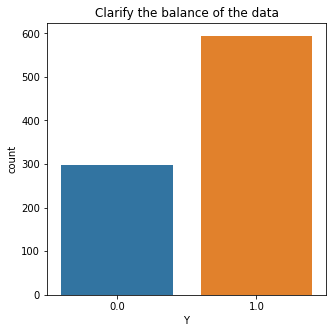

In [39]:
matplotlib.rcParams['figure.figsize'] = (5,5)
sns.countplot(data["Y"])
plt.title("Clarify the balance of the data")
plt.show();

This is very bad the data is unbalanced and this will affect the algorithm that we will definitely use.

The problem of unbalanced data is a real problem, but we do not have a reference to the source of that data in order to work on increasing the data and reducing the imbalance between the data categories. We do this step because the data has limits and must be taken into account because if we do not do this we will get a misleading algorithm.

# missing values

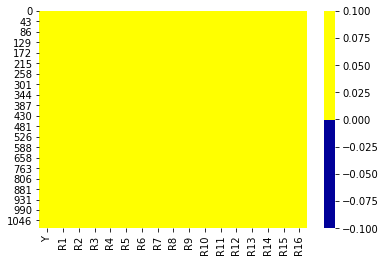

In [37]:
cols =data.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

There is nothing on the heat map that shows just any data. So we will move on to the next step.

# We get rid of duplicate data

In [11]:
print('data shape befor remove duplicate = ' , data.shape)

data shape befor remove duplicate =  (1118, 18)


In [12]:
data.duplicated().sum()

224

In [13]:
data = data.drop('YEAR', axis=1).drop_duplicates()

print('data shape after removing duplicate = ' , data.shape)

data shape after removing duplicate =  (892, 17)


In [14]:
# Separate the target column from the rest of the data
from sklearn.model_selection import train_test_split
target=data["Y"]
features=data.drop(["Y"],axis=1)

# Data Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)

MinMaxScaler()

In [16]:
new_features = scaler.transform(features)
print(new_features)

[[2.91798260e-03 2.46900345e-03 1.20528222e-02 ... 2.85500879e-01
  1.11332100e-04 8.68737830e-02]
 [3.02594047e-03 2.38307526e-03 1.38426828e-02 ... 2.86057411e-01
  1.31047160e-04 8.77146398e-02]
 [2.77695093e-03 2.20467196e-03 1.31431593e-02 ... 2.85559461e-01
  9.97350064e-05 8.67852717e-02]
 ...
 [9.67252572e-04 9.91856871e-04 2.39085956e-03 ... 2.81810193e-01
  9.79954423e-05 8.12975748e-02]
 [5.77855408e-04 7.58623201e-04 1.37605791e-03 ... 2.81634446e-01
  8.34990751e-05 8.10320411e-02]
 [5.44157576e-04 6.21138090e-04 1.54354944e-03 ... 2.81751611e-01
  1.73376552e-04 8.12090636e-02]]


In [17]:
print(new_features.shape)

(892, 16)


In [18]:
from sklearn import preprocessing 
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(target)

In [19]:
print(y.shape)

(892,)


In [40]:
# Complete the data separation. 
x_train,x_test,y_train,y_test=train_test_split(new_features,target,test_size=0.1,random_state=0)

In [21]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(802, 16) (90, 16) (802,) (90,)


# Quick measurement of the performance of classification algorithms

In [22]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

In [23]:
model = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = model.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 14.86it/s]


In [24]:
print(predictions)

                               Accuracy  ...  Time Taken
Model                                    ...            
ExtraTreesClassifier               0.93  ...        0.17
LGBMClassifier                     0.89  ...        0.18
XGBClassifier                      0.89  ...        0.25
RandomForestClassifier             0.89  ...        0.28
KNeighborsClassifier               0.89  ...        0.02
Perceptron                         0.82  ...        0.02
BaggingClassifier                  0.87  ...        0.08
ExtraTreeClassifier                0.86  ...        0.01
NearestCentroid                    0.77  ...        0.02
AdaBoostClassifier                 0.86  ...        0.15
DecisionTreeClassifier             0.80  ...        0.02
LogisticRegression                 0.84  ...        0.04
PassiveAggressiveClassifier        0.82  ...        0.02
NuSVC                              0.82  ...        0.05
LinearSVC                          0.81  ...        0.11
SGDClassifier                  

# ExtraTreesClassifier Algorithm

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

In [97]:
model = ExtraTreesClassifier(n_estimators=50, random_state=0, min_samples_leaf=1,max_features='log2',bootstrap=True, oob_score=True)

In [98]:
model.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=True, max_features='log2', n_estimators=50,
                     oob_score=True, random_state=0)

In [99]:
print('ExtraTreesClassifiermodel Train Score is : ' , model.score(x_train, y_train))

ExtraTreesClassifiermodel Train Score is :  1.0


In [100]:
print('ExtraTreesClassifiermodel Test Score is : ' , model.score(x_test, y_test))
print('ExtraTreesClassifiermodel features importances are : ' , model.feature_importances_)

ExtraTreesClassifiermodel Test Score is :  0.9333333333333333
ExtraTreesClassifiermodel features importances are :  [0.05468601 0.06861504 0.06064372 0.0683231  0.07328431 0.04893224
 0.04276825 0.05027291 0.01900332 0.04864591 0.05146026 0.04493097
 0.0598756  0.11345116 0.03784385 0.15726334]


In [42]:
#Calculating Prediction
y_predict = model.predict(x_test)
y_predict_prob = model.predict_proba(x_test)
print('Predicted Value for ExtraTreesClassifiermodel is : ' , y_predict[:10])
print('the real values which we want to predict    is :\n' , y_test[:10])
print('Prediction Probabilities Value for ExtraTreesClassifiermodel is : ' , y_predict_prob[:10])

Predicted Value for ExtraTreesClassifiermodel is :  [1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]
the real values which we want to predict    is :
 503   1.00
766   1.00
278   0.00
31    1.00
255   1.00
298   0.00
665   1.00
318   0.00
492   1.00
367   1.00
Name: Y, dtype: float64
Prediction Probabilities Value for ExtraTreesClassifiermodel is :  [[0.14 0.86]
 [0.2  0.8 ]
 [0.87 0.13]
 [0.03 0.97]
 [0.25 0.75]
 [0.88 0.12]
 [0.16 0.84]
 [0.25 0.75]
 [0.08 0.92]
 [0.06 0.94]]


Confusion Matrix is : 
 [[21  5]
 [ 1 63]]


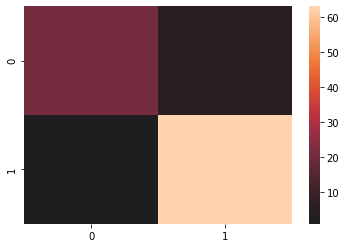

In [32]:
from sklearn.metrics import confusion_matrix
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

**The model that we built and trained has a problem which is overfitting, so to solve this problem we have to increase the data from the original data source so that there is homogeneity in the data and thus it is easy to form or discover a pattern in the data, because the good and the bad in machine learning algorithms is that The data didn't have a pattern he would create and that's a problem.**

So we have to increase the amount of data, and the data also suffers from some defects from the point of view of the one based on building the algorithm and processing that data, which is the large number of zeros in the data. This will cause a defect, but we worked to reduce this defect by scaling the data, and this may not be a defect but rather it The correct values ​​and this is also a problem because we do not have a reference to the basis of that data until we know or get answers about the questions we face during data processing. 